# Clustering.#
## Describe the spatial distribution in order to classify each format loss run report ##

In [1]:
## Load dependecies
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp
import cv2 
import lossrun
import pandas as pd

In [2]:
## load report by classe VGM
PATH_a = '/home/zned897/Downloads/Extract2(1)/vgm/'
files_a = os.listdir(PATH_a)

## load report by classe PIONER
PATH_b = '/home/zned897/Downloads/Extract2(1)/pioneer/'
files_b = os.listdir(PATH_b)

## load report by classe 
PATH_c = '/home/zned897/Downloads/Extract2(1)/sedgwick/'
files_c = os.listdir(PATH_c)

# read the data from pdf of interes
_txt_path = './data/txt/'
_image_path = './data/images/'

# class A files
txt_a_files = [j for i in files_a for j in (os.listdir(_txt_path)) if i[:-4] in j]
iamge_a_files = [j for i in files_a for j in (os.listdir(_image_path)) if i[:-4] in j]

# class b files 
txt_b_files = [j for i in files_b for j in (os.listdir(_txt_path)) if i[:-4] in j]
iamge_b_files = [j for i in files_b for j in (os.listdir(_image_path)) if i[:-4] in j]

# class c files
txt_c_files = [j for i in files_c for j in (os.listdir(_txt_path)) if i[:-4] in j]
iamge_c_files = [j for i in files_c for j in (os.listdir(_image_path)) if i[:-4] in j]

In [3]:




# extract features from A, B, and C directories
A_data = lossrun.extract_statistic_featrues([_txt_path + _file for _file in txt_a_files])

B_data = lossrun.extract_statistic_featrues([_txt_path + _file for _file in txt_b_files])

C_data = lossrun.extract_statistic_featrues([_txt_path + _file for _file in txt_c_files])

In [4]:

## Pre processing data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# general data
DATA = lossrun.extract_statistic_featrues([_txt_path + _file for _file in os.listdir(_txt_path)])

# data dormalization
sc = StandardScaler()
data_norm = sc.fit_transform(DATA.T)

print(data_norm.shape)
# Principal components decompsition 
pca = PCA(n_components=2)
componets = pca.fit_transform(data_norm)


(213, 10)


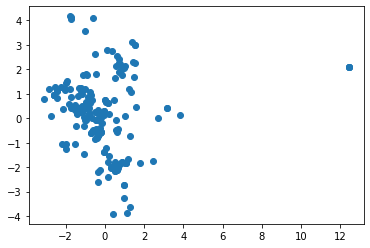

In [5]:
plt.scatter(componets[:,0],componets[:,1])


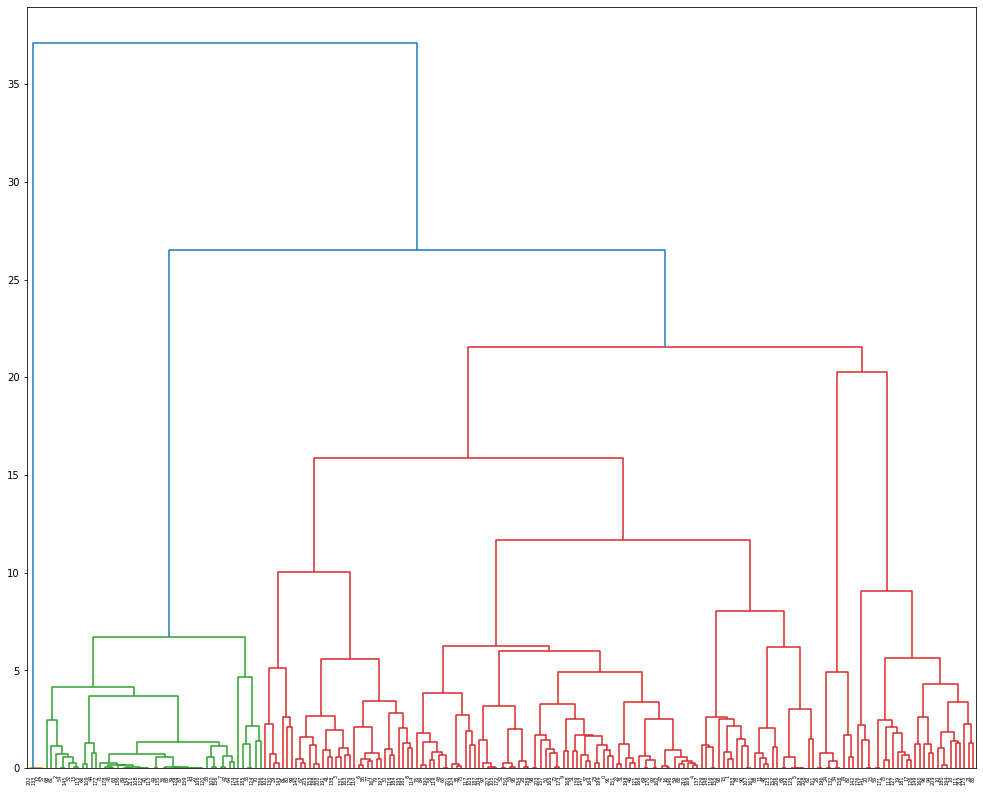

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(17,14))
dend = shc.dendrogram(shc.linkage(data_norm, method='ward'))

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') 

cluster.fit_predict(data_norm)

array([0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 2, 2, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 4, 1, 4, 2, 0, 0, 0, 0, 2, 2, 4, 2, 2, 0, 0, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 3, 0, 0, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0,
       4, 3, 2, 2, 2, 0, 0, 0, 0, 1, 4, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1])

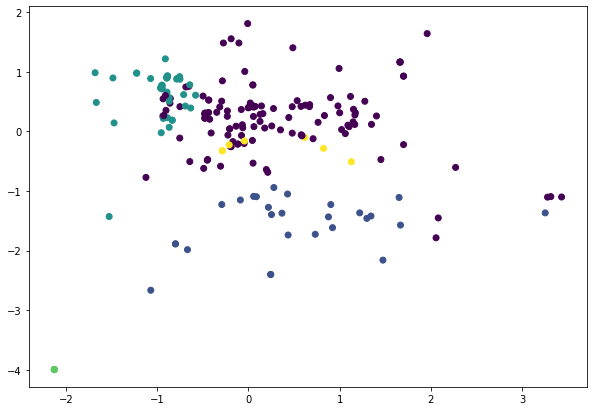

In [8]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_norm[:,1], data_norm[:,2], c=cluster.labels_)